In [1]:
import urllib.request
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from numpy import random

In [2]:
# the marathon route is published as an XML file, I grabbed it from the site
# data = urllib.request.urlretrieve('https://public.3.basecamp.com/p/pSz2gnPNvNXJmeCF4o86EWbb/upload/download/SAS_Halbmarathon_der_TSG_78_Heidelberg.gpx','assets/SAS_Halbmarathon_der_TSG_78_Heidelberg.gpx')
# It's included in the repo so no need to download

In [3]:
# read the data in
root = ET.parse('assets/SAS_Halbmarathon_der_TSG_78_Heidelberg.gpx').getroot()

In [4]:
# checking what's in the file, we need the track

for child in root:
    print(child.tag, child.attrib)

{http://www.topografix.com/GPX/1/1}metadata {}
{http://www.topografix.com/GPX/1/1}trk {}


In [5]:
# oull the data out of the file

lat = []
lon = []
for child in root[1][1]:
    lat.append(float(child.attrib['lat']))
    lon.append(float(child.attrib['lon']))
    
# convert lists to np.array so they are nicer to do things with
lat = np.array(lat)
lon = np.array(lon)

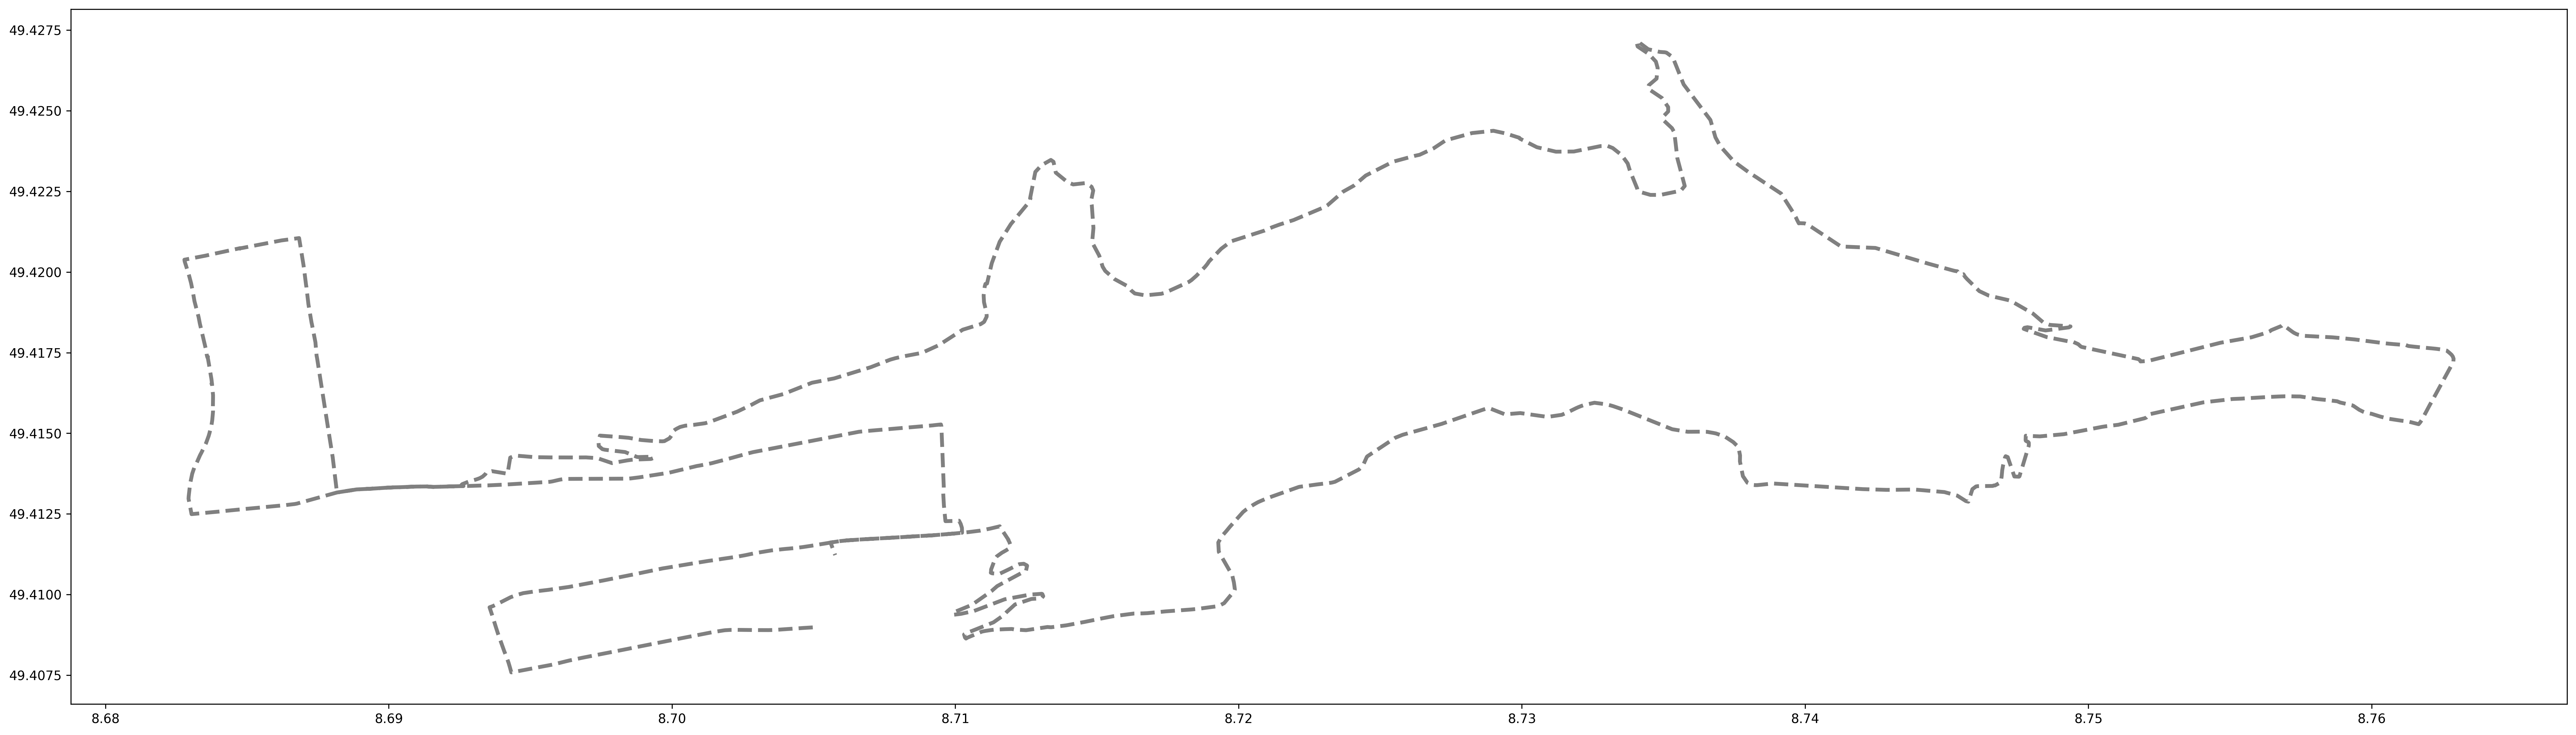

In [6]:
# make a test plot, to check the data

plt.figure(figsize=(35, 10), dpi=300)
plt.plot(lon, lat,'--', color="gray", linewidth=3)

In [7]:
# Create a shapely polygon from the longitude and latitude points

array = np.array([lon, lat]).T
poly = Polygon(array)

In [8]:
# The simplify method can smooth out the details
# You can play around with the "smoothing" parameter to decide how many "kinks" you want
# I played around with values from 0.1 to 0.0001 and plotted the points to see which worked best
# preserve_topology = True by default, setting it to False gives us several output polygons

vertexes = poly.simplify(0.001, preserve_topology=False)

for ver in vertexes.geoms:
    print(ver)
    

POLYGON ((8.704969 49.408981, 8.694327 49.407586, 8.693559 49.409604, 8.705510521717207 49.411260589820756, 8.704969 49.408981))
POLYGON ((8.710219859395531 49.412002132720104, 8.709493 49.415273, 8.683039 49.412493, 8.682787 49.420382, 8.686836 49.421053, 8.688172 49.413164, 8.699256 49.414203, 8.697454 49.414928, 8.710996 49.418441, 8.713374 49.423476, 8.716702 49.419277, 8.728245 49.42431, 8.735611 49.422522, 8.734101 49.427172, 8.739779 49.421509, 8.749369 49.418313, 8.747717 49.418238, 8.762892 49.417312, 8.761658 49.415282, 8.75406 49.415959, 8.74779 49.414924, 8.745764 49.412879, 8.728817 49.415783, 8.720252 49.412625, 8.719315 49.409652, 8.710378 49.408635, 8.713105 49.409949, 8.709922 49.409371, 8.712497 49.410744, 8.711254 49.410676, 8.71157 49.412116, 8.710219859395531 49.412002132720104))


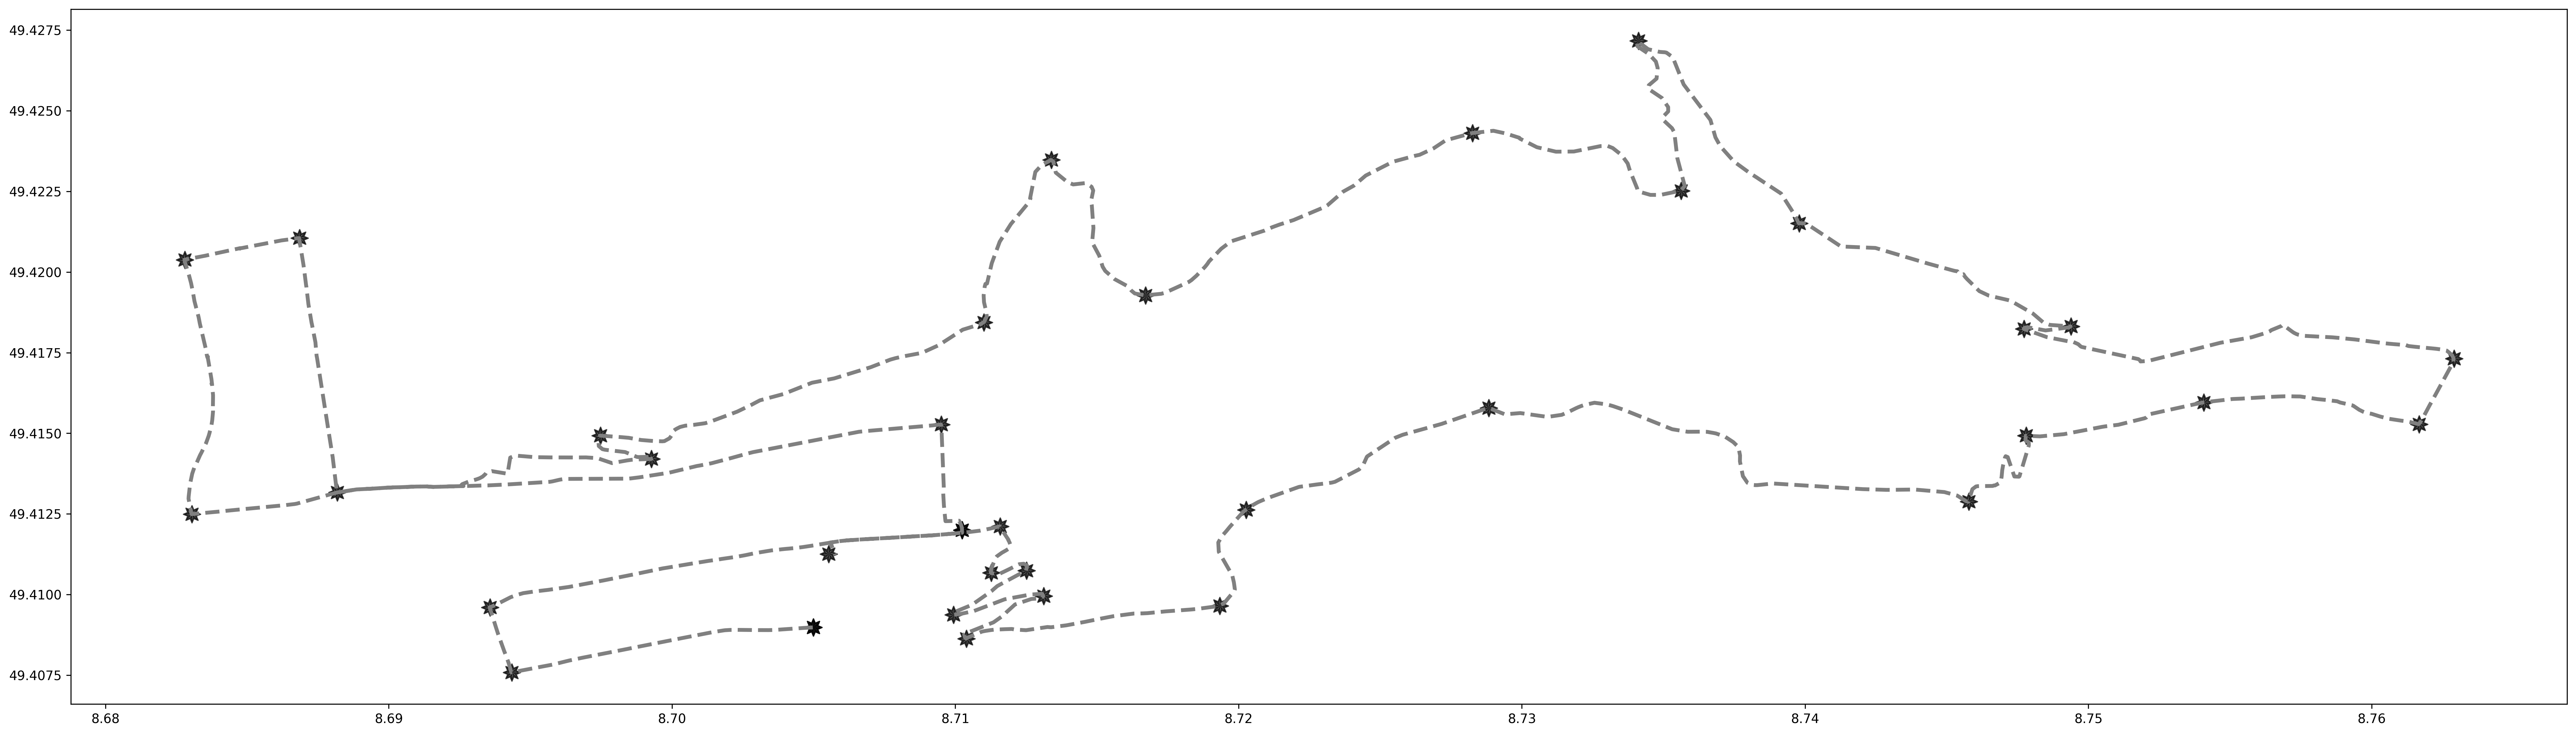

In [9]:
# now plot with the vertexes

plt.figure(figsize=(35, 10), dpi=300)
plt.plot(np.array(lon), np.array(lat),'--', color="gray", linewidth=3)

# note: the marker is a unicode symbol

for ver in vertexes.geoms:
    x, y = Polygon(ver).exterior.coords.xy
    #plt.scatter(x,y,color='black', marker="$\u2735$", s=(random.rand(len(x))*50)**2, alpha=0.7)
    plt.scatter(x,y,color='black', marker="$\u2735$", s=200, alpha=0.7)


In [10]:
# now add a background of random stars that are not part of the "constellation"

n_random = 20
x_min = min(x)-0.01
x_max = max(x)+0.01
random_x = (x_max-x_min)*random.ranf(n_random) + x_min

y_min = min(y) - 0.001
y_max = max(y) + 0.001
random_y = (y_max-y_min)*random.ranf(n_random) + y_min

# I want the additional stars to all be fainter

random_star_size = (random.rand(n_random)*25.)**2

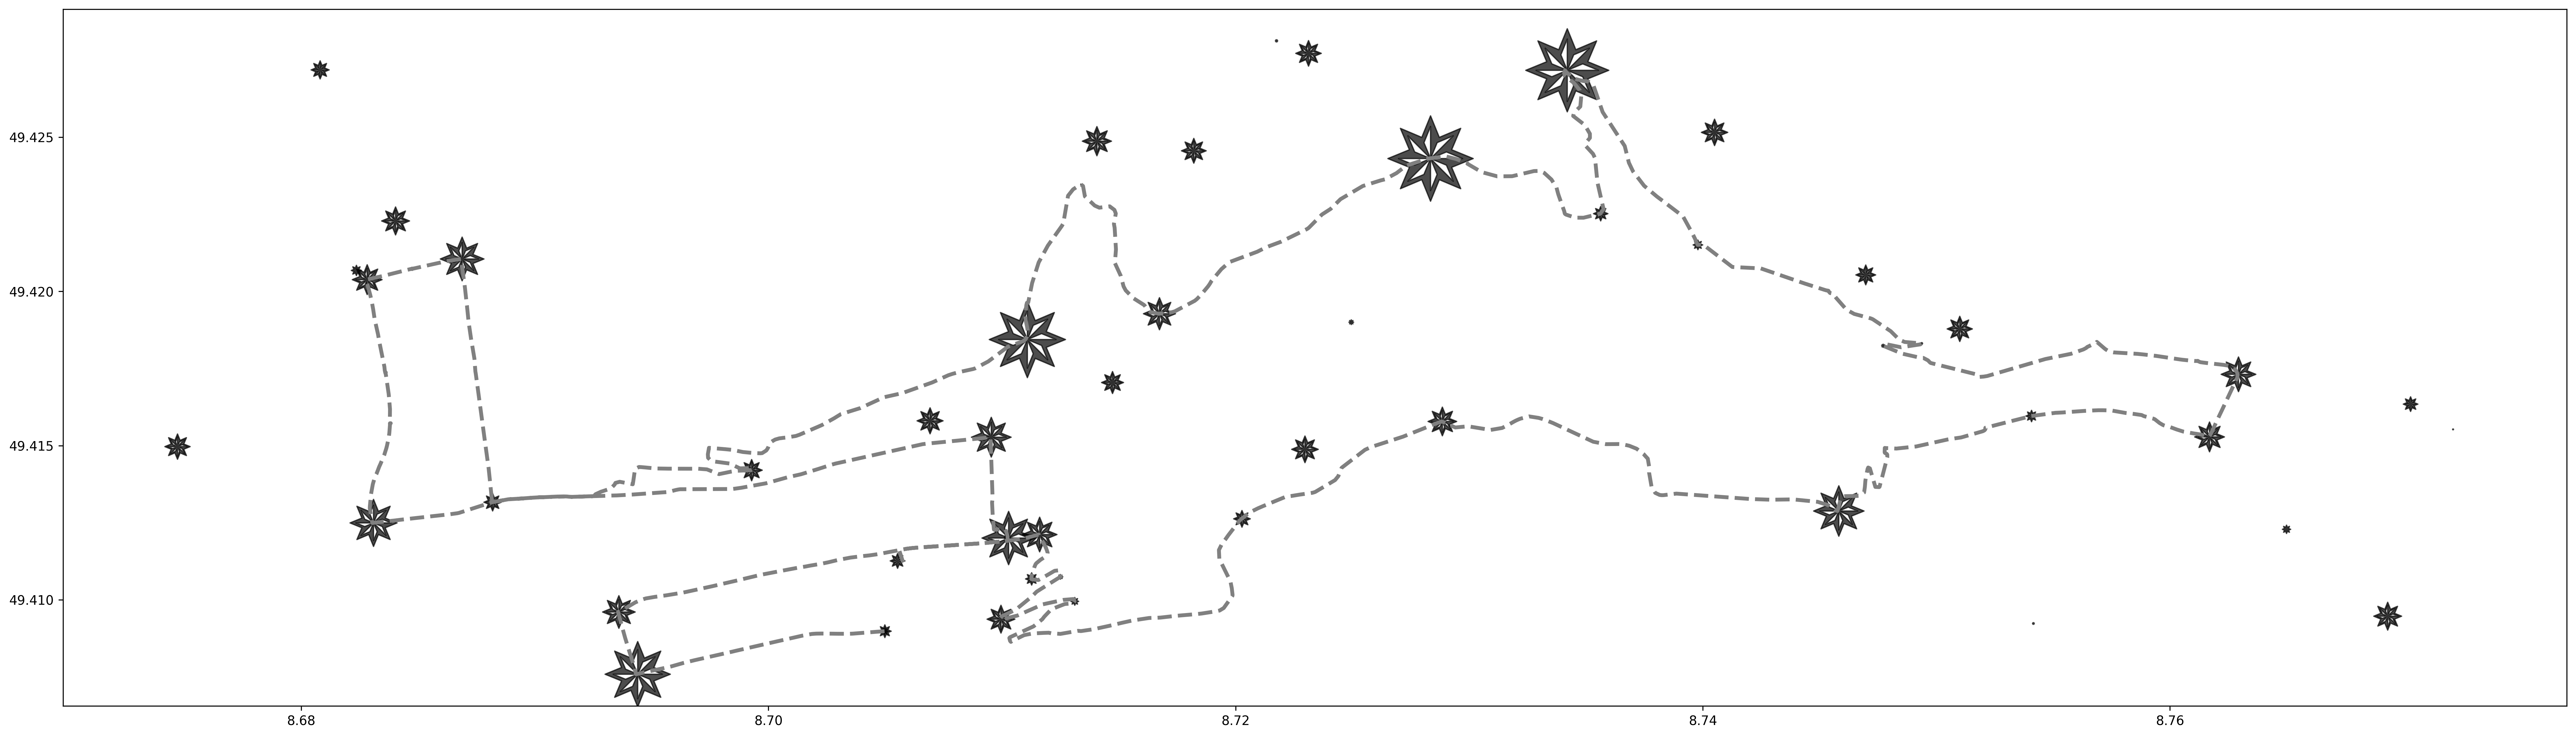

In [15]:
plt.figure(figsize=(35, 10), dpi=300)
plt.plot(np.array(lon), np.array(lat),'--', color="gray", linewidth=3)
plt.scatter(random_x,random_y,color='black', marker="$\u2735$", s=random_star_size, alpha=0.7)


# I wanted there to be more faint stars than bright
# so I set the size of the marker is a random exp number, 
# there are lots of ways to do this
# might want to run this a few times until it looks right

for ver in vertexes.geoms:
    x, y = Polygon(ver).exterior.coords.xy
    #plt.scatter(x,y,color='black', marker="$\u2735$", s=(random.rand(len(x))*50)**2, alpha=0.7)
    plt.scatter(x,y,color='black', marker="$\u2735$", s=(random.exponential(scale=1.,size=len(x))*20.)**2, alpha=0.7)

plt.savefig('assets/heidelberg_marathon.pdf', dpi=300)

Another method to do the something similar (but not what I'm trying to do here) is to use the `ConvexHull` method. `shapely` has one, but here is an example with `scipy.spatial`. A convex hull is the smallest set of points that entirely contains all the points in the set. Here is how it works:

In [12]:
from scipy.spatial import ConvexHull

In [13]:
array = np.array([lon, lat]).T
hull = ConvexHull(array)

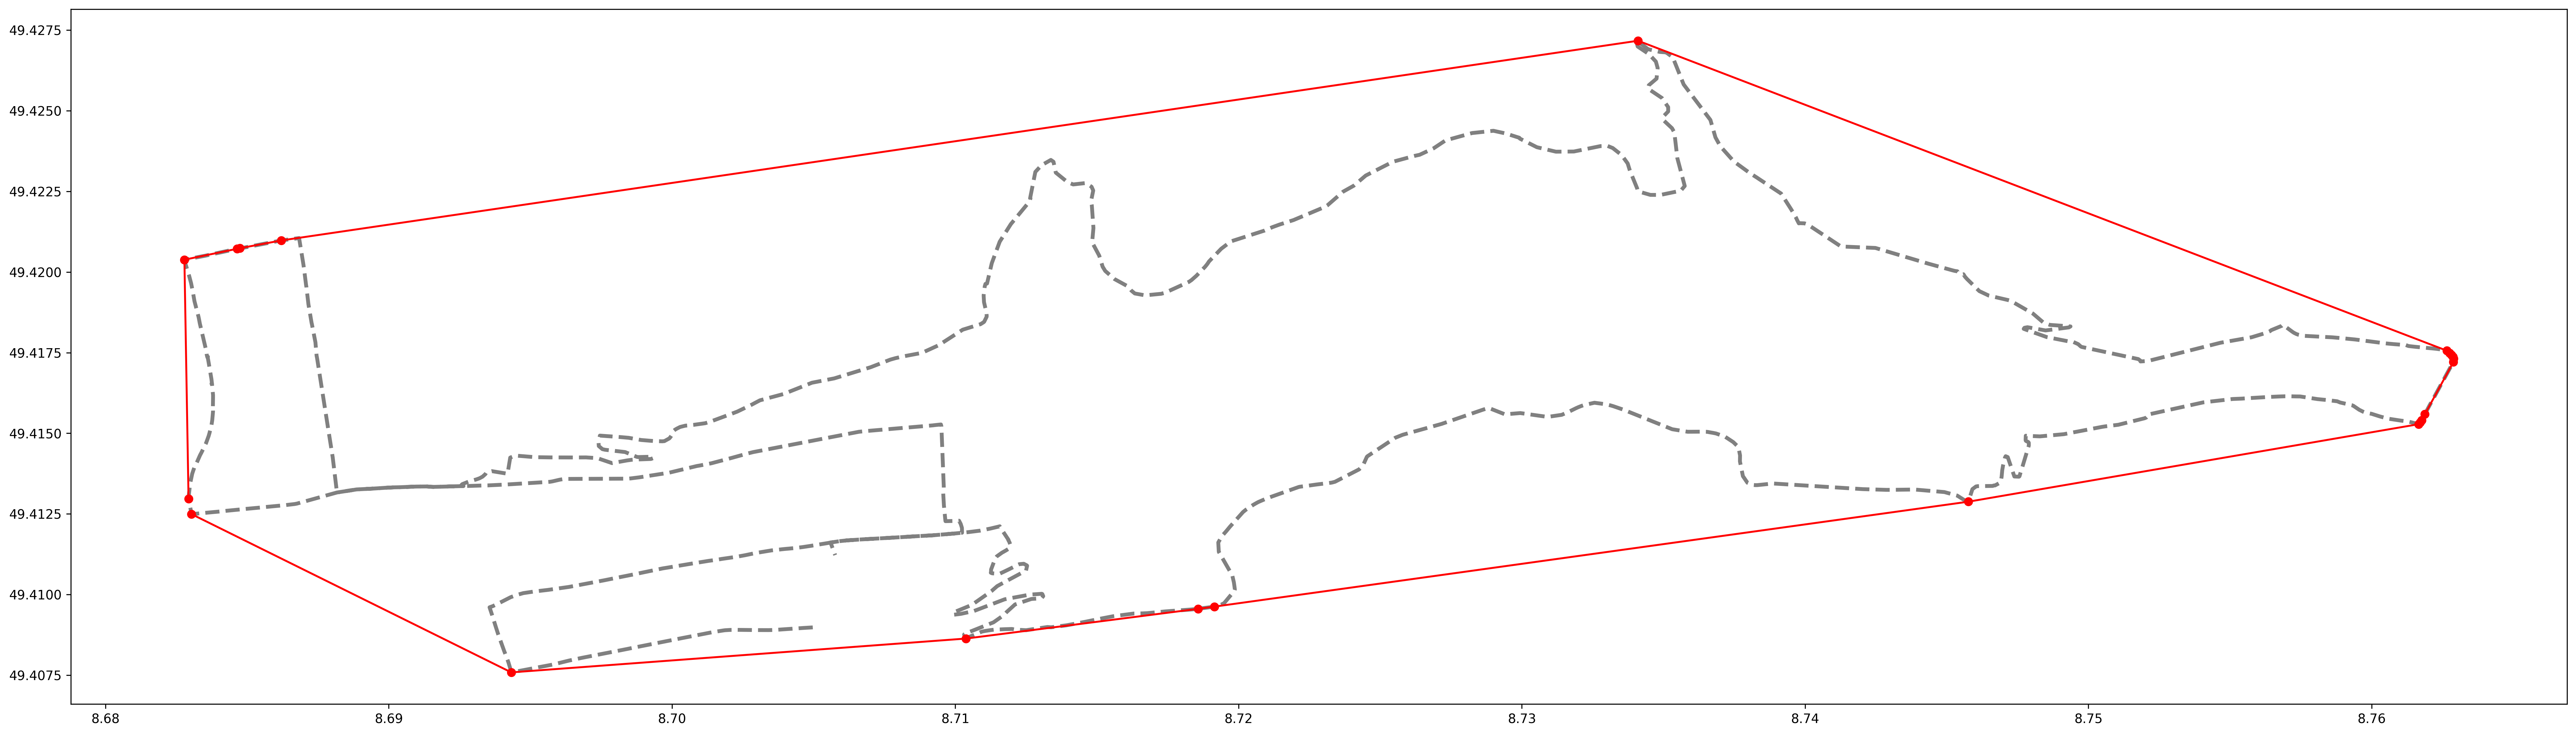

In [14]:
plt.figure(figsize=(35, 10), dpi=300)
plt.plot(np.array(lon), np.array(lat),'--', color="gray", linewidth=3)
plt.plot(np.array(lon)[hull.vertices], np.array(lat)[hull.vertices],'o-', color="red")

As you can see, the convex hull points, as defined by the red outline, completely encircle the other points in the set. They do no define all the convex vertices for this exercise. This may be useful for other purposes though.